In [1]:
import numpy as np
import pandas as pd
import re 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
train = pd.read_csv('titanic-training.csv')
test = pd.read_csv('titanic-testing.csv')

# Exploratory Data Analysis

In [3]:
PassId = test['PassengerId']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
original_train = train.copy()
original_test = test.copy()

In [6]:
#list of passengers with cabin
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Has_Cabin        0
dtype: int64

In [11]:
train.drop(['Cabin'],axis=1,inplace=True) ## Replaced with Has_Cabin
test.drop(['Cabin'],axis=1,inplace=True) ## Replaced with Has_Cabin
train['Embarked'] = train['Embarked'].fillna('None') ## Filling null values in Embarked
test['Fare'] = test['Fare'].fillna(test['Fare'].median()) ## Filling null values in Fare

In [12]:
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(train[['Embarked']])
train = pd.concat([train.drop(['Embarked'],axis=1), pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_[0])],axis=1)
oe_results = oe_style.fit_transform(test[['Embarked']])
test = pd.concat([test.drop(['Embarked'],axis=1), pd.DataFrame(oe_results.toarray(),columns = oe_style.categories_[0])],axis=1)

In [13]:
print(train.corr().loc['Survived',['C','Q','S','None']])

C       0.168240
Q       0.003650
S      -0.155660
None    0.060095
Name: Survived, dtype: float64


#### Since the Embarked values are very less correlated to the Survival, we will drop those columns

In [14]:
train.drop(train.columns[-4:],axis=1,inplace=True)
test.drop(test.columns[-3:],axis=1,inplace=True)

In [15]:
## Filling null values for Age 
age_avg_train = train['Age'].mean()
age_avg_test = test['Age'].mean()
age_std_train = train['Age'].std()
age_std_test = test['Age'].std()
age_null_count_train = train['Age'].isnull().sum()
age_null_count_test = test['Age'].isnull().sum()
age_null_random_train = np.random.randint(age_avg_train - age_std_train, age_avg_train + age_std_train, size=age_null_count_train)
age_null_random_test = np.random.randint(age_avg_test - age_std_test, age_avg_test + age_std_test, size = age_null_count_test)

train.loc[np.isnan(train['Age']),'Age'] = age_null_random_train
test.loc[np.isnan(test['Age']),'Age'] = age_null_random_test
train['Age'] = train['Age'].astype(int)
test['Age'] = train['Age'].astype(int)

<AxesSubplot:>

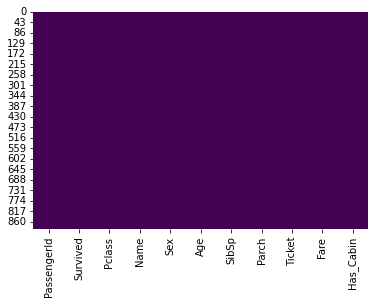

In [16]:
sns.heatmap(train.isnull(),cbar=False, cmap='viridis')

<AxesSubplot:>

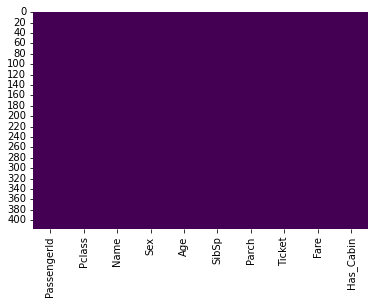

In [17]:
sns.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,38,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,1


In [19]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin
0,892,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44,0,0,PC 17758,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,30,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,3,"Ware, Mr. Frederick",male,34,0,0,359309,8.0500,0


In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [21]:
train['Sex'] = train[['Sex']].apply(lb.fit_transform)
test['Sex'] = test[['Sex']].apply(lb.fit_transform)

# Feature Selection

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,38,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,1


In [23]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin
0,892,3,"Kelly, Mr. James",1,22,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,38,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",1,26,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",1,35,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,35,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,26,0,0,A.5. 3236,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,44,0,0,PC 17758,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,30,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,3,"Ware, Mr. Frederick",1,34,0,0,359309,8.0500,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

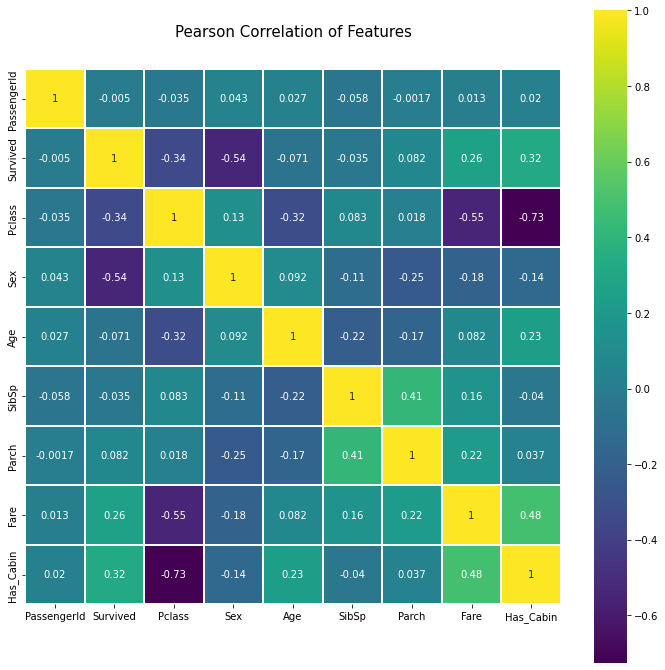

In [24]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
X_feat = train.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
y = train[['Survived']]

In [27]:
features = SelectKBest(chi2, k=5).fit(X_feat,y)

In [28]:
features.scores_

array([3.08736994e+01, 9.27024470e+01, 2.72039745e+01, 2.58186538e+00,
       1.00974991e+01, 4.51831909e+03, 6.89974116e+01])

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [30]:
model = ExtraTreesClassifier()

In [31]:
model.fit(X_feat,y)

C:\Users\disha\AppData\Local\Temp/ipykernel_6248/4085451121.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_feat,y)


ExtraTreesClassifier()

In [32]:
model.feature_importances_

array([0.07871698, 0.28367929, 0.25422714, 0.04218793, 0.03854959,
       0.24903311, 0.05360597])

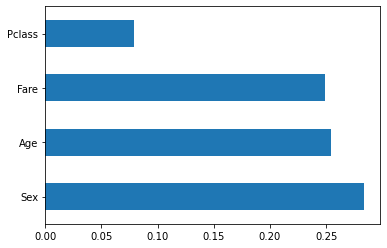

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [34]:
sel_features = feat_importances.nlargest(4).index

In [35]:
X = train[sel_features]

# Data Pre-Processing

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(dict(zip(X.columns,scaler.fit_transform(X).T)))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_lReg = LogisticRegression()
model_lReg .fit(X_train,y_train)

C:\Users\disha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
print("Training Accuracy:", model_lReg.score(X_train,y_train))

Training Accuracy: 0.7874251497005988


In [42]:
print("Testing Accuracy:", model_lReg.score(X_test,y_test))

Testing Accuracy: 0.7757847533632287


# Decision Tree

In [43]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
print(list(train.columns))
max_attributes = len(list(train))
depth_range = range(1, max_attributes)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(X):
        f_train_X = X.loc[train_fold] # Extract train data with cv indices
        f_valid_X = X.loc[valid_fold] # Extract valid data with cv indices
        f_train_y = y.loc[train_fold]
        f_valid_y = y.loc[valid_fold]

        model = tree_model.fit(X = f_train_X, y = f_train_y) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid_X, y = f_valid_y)# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
#     print("Accuracy per fold: ", fold_accuracy, "\n")
#     print("Average accuracy: ", avg)
#     print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Has_Cabin']
 Max Depth  Average Accuracy
         1          0.786729
         2          0.766654
         3          0.814819
         4          0.800337
         5          0.816005
         6          0.799213
         7          0.810437
         8          0.803720
         9          0.803695
        10          0.794719


In [45]:
model_dTree = tree.DecisionTreeClassifier(max_depth = 3)
model_dTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
print("Training Accuracy:", model_dTree.score(X_train,y_train))

Training Accuracy: 0.8263473053892215


In [47]:
print("Testing Accuracy:", model_dTree.score(X_test,y_test))

Testing Accuracy: 0.8026905829596412


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rFrst = RandomForestClassifier(n_estimators=1000,random_state=42)
model_rFrst.fit(X_train,y_train)

C:\Users\disha\AppData\Local\Temp/ipykernel_6248/1919330905.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rFrst.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [50]:
print("Training Accuracy:", model_rFrst.score(X_train,y_train))

Training Accuracy: 0.9805389221556886


In [51]:
print("Testing Accuracy:", model_rFrst.score(X_test,y_test))

Testing Accuracy: 0.7847533632286996


# Prediction of the Testing Dataset
### Testing Accuracy of Logistic Regression was best. So, applying that model on the testing dataset

In [52]:
X_pred = test[sel_features]

In [53]:
y_pred = model.predict(X_pred)

In [54]:
submission = pd.DataFrame({
    "PassengerId": PassId,
    "Survived": y_pred
})
submission.to_csv('submission.csv', index=False)